In this notebook, we will explore learn about the WhyLogs Python library and the resulting profile summaries. 

# Getting Started with WhyLogs Profile Summaries

We will first read in raw data into Pandas from file and explore that data briefly. To run WhyLogs, we will then import the WhyLogs library, initialize a logging session with WhyLogs, and create a profile that data -- resulting in a WhyLogs profile summary. Finally, we'll explore some of the features of the profile summary content.

First, we will import a few standard data science Python libraries.

In [1]:
import datetime
import os.path
import pandas as pd
import numpy as np

WhyLogs allows you to characterize and store key characteristics of a growing dataset efficiently. In machine learning, datasets often consist of both input features and outputs of the model. In deployed systems, you often have a relatively static training dataset as well as a growing dataset from model input and output at inference time.

## Downloading and exploring the raw Lending Club data

In our case, we will download and explore a sample from the Lending Club dataset before logging a WhyLogs profile summary. Lending Club is a peer-to-peer lending and alternative investing website on which members may apply for personal loans and invest in personal loans to other Lending Club members. The company published a dataset with information starting in 2013(?). This particular dataset contains only the accepted loans.

Our example input data is located at `lending_club_demo.csv`. You may use the Juypyter command `!` in front of cell contents to execute a Bash command like `cd` to navigate if necessary.

In [2]:
data_file = "lending_club_demo.csv"

Let's read in that data file into a Pandas dataframe and look at the entries for *January 2017*.

Each row refers to a particular loan instance while each column refers to a variable in our dataset.

In [3]:
full_data = pd.read_csv(os.path.join(data_file))
full_data['issue_d'].describe()

data = full_data[full_data['issue_d'] == 'Jan-2017']
data

/Users/andy/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,117) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
10599,96596008,NaN,15000.0,15000.0,15000.0,36 months,15.99,527.29,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10601,96703051,NaN,14575.0,14575.0,14575.0,36 months,25.49,583.29,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10602,96960509,NaN,5000.0,5000.0,5000.0,36 months,8.24,157.24,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10603,97463966,NaN,13200.0,13200.0,13200.0,60 months,13.99,307.08,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10605,96841832,NaN,9500.0,9500.0,9500.0,36 months,8.24,298.75,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,95617334,NaN,6500.0,6500.0,6250.0,36 months,5.32,195.75,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10915,95129874,NaN,15000.0,15000.0,15000.0,60 months,15.99,364.70,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10916,96187258,NaN,40000.0,40000.0,40000.0,36 months,7.49,1244.07,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
10917,94469381,NaN,5050.0,5050.0,5050.0,36 months,21.49,191.54,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Noteworthy Lending Club dataset variables

**`loan_status` (categorical, string)**:
> current status of the Lending Club loan

**`annual_inc` (numeric)**:
> the self-reported annual income provided by the borrower during registration

**`dti` (numeric)**:
> ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

**`issue_d` (timestamp, string)**:
> the month (and year) which the loan was funded -- useful for backfilling data

## Running WhyLogs for logging a single dataset

Let's now explore import a function from Why Labs that allows us to create a logging session.

This session can be connected with multiple writers that output the results of our profiling locally in JSON, a flat CSV, or binary protobuf format as well as writers to an AWS S3 bucket in the cloud. Further writing functionality will be added as well.

Let's create a default session below.

In [4]:
from whylogs import get_or_create_session

session = get_or_create_session()

# Quickly log a dataframe

You can call `log_dataframe` to quickly log a Pandas dataframe

In [5]:
session.log_dataframe(data.head(100), 'demo')

Now that we've logged our dataset, we can see the output of the WhyLogs profiling process in created directory. Inside of our original directory, the WhyLogs logger creates an `output` directory containing folders for our named dataset `demo` and the associated timestamp. Inside, we see the what has been logged.

In [6]:
print("Current working directory:", os.getcwd())

Current working directory: /Volumes/Workspace/whylogs-examples/python


# WhyLogs output

Using the Logger API you get a specific output structure.

In [7]:
!tree whylogs-output

whylogs-output
└── demo
    ├── dataset_profile
    │   └── protobuf
    │       └── datase_profile-batch.bin
    └── dataset_summary
        ├── flat_table
        │   └── dataset_summary-batch.csv
        ├── freq_numbers
        │   └── dataset_summary-batch.json
        ├── frequent_strings
        │   └── dataset_summary-batch.json
        ├── histogram
        │   └── dataset_summary-batch.json
        └── json
            └── dataset_summary-batch.json

9 directories, 6 files


## Using Logger API
Logger API can be used to log data as well. The data stays in memory until you call `.close()` explicitly, using `with` statement.

In [8]:
with session.logger(dataset_name="another-dataset", dataset_timestamp=datetime.datetime(2020, 9, 22, 0, 0)) as logger:
    logger.log_dataframe(data)

Here you can see the output having datetime as the suffix

In [9]:
!tree whylogs-output

whylogs-output
├── another-dataset
│   ├── dataset_profile
│   │   └── protobuf
│   │       └── datase_profile-1600732800000.bin
│   └── dataset_summary
│       ├── flat_table
│       │   └── dataset_summary-1600732800000.csv
│       ├── freq_numbers
│       │   └── dataset_summary-1600732800000.json
│       ├── frequent_strings
│       │   └── dataset_summary-1600732800000.json
│       ├── histogram
│       │   └── dataset_summary-1600732800000.json
│       └── json
│           └── dataset_summary-1600732800000.json
└── demo
    ├── dataset_profile
    │   └── protobuf
    │       └── datase_profile-batch.bin
    └── dataset_summary
        ├── flat_table
        │   └── dataset_summary-batch.csv
        ├── freq_numbers
        │   └── dataset_summary-batch.json
        ├── frequent_strings
        │   └── dataset_summary-batch.json
        ├── histogram
        │   └── dataset_summary-batch.json
        └── json
            └── dataset_summary-batch.json

18 directories, 12 files


## Using Dataset Profile

Instead of interacting with the Logger, which writes to disk, sometimes you want to interact  with a `DatasetProfil` object.

In that case, you can use the `session.new_profile` to get an empty profile

In [10]:
profile = session.new_profile(dataset_name="in-memory", dataset_timestamp=datetime.datetime(2020, 9, 22, 0, 0))
profile

## Profiling a DataFrame

In [11]:
profile.track_dataframe(data)

This DatasetProfile object, stored in the `profile` variable, can now be referenced from Python.

This object contains helpful information about the profile, such as the session ID, the dates associated with both the data and session, and user-specified metadata and tags.

First, let's transform the dataset profile into the flat summary form. Unlike the binary `protobuf.bin` file and the hierarchical `whylogs.json` file that was written using the logger, the summary format makes it much easier to analyze and run data science processes on the data. This structure is much more flat, a table format or a single depth dictionary format organized by variable.

These less hierarchical formats were also created with the `log_dataframe` functionality and can be found in the `summary_summary.csv`, `summary_histogram.json` and `summary_strings.json` files.

In [12]:
summaries = profile.flat_summary()

Let's first look at the overall summary for the profiled dataset.

In [13]:
summary = summaries['summary']
summary

,column,count,null_count,bool_count,numeric_count,max,mean,min,stddev,nunique_numbers,...,ununique_str_upper,quantile_0.0000,quantile_0.0100,quantile_0.0500,quantile_0.2500,quantile_0.5000,quantile_0.7500,quantile_0.9500,quantile_0.9900,quantile_1.0000
0,mort_acc,309.0,0.0,0.0,309.0,8.0,1.472492,0.0,1.708474,9.0,...,0.0,0.000000,0.0,0.000000,0.000000,1.000000,2.0,5.0,7.0,8.0
1,sec_app_mths_since_last_major_derog,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,emp_length,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,payment_plan_start_date,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hardship_dpd,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,pct_tl_nvr_dlq,309.0,0.0,0.0,309.0,100.0,93.916828,33.3,9.528527,77.0,...,0.0,33.299999,50.0,73.300003,91.900002,97.699997,100.0,100.0,100.0,100.0
146,open_rv_12m,309.0,0.0,0.0,309.0,6.0,1.126214,0.0,1.276762,7.0,...,0.0,0.000000,0.0,0.000000,0.000000,1.000000,2.0,4.0,6.0,6.0
147,tot_hi_cred_lim,309.0,0.0,0.0,309.0,831460.0,176101.592233,5098.0,160172.067606,309.0,...,0.0,5098.000000,7400.0,14225.000000,52700.000000,120356.000000,264391.0,511645.0,618297.0,831460.0
148,settlement_date,309.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that this summary object is much smaller at **151 rows x 32 columns** than the original dataset at **1000 rows x 151 columns**. Smaller storage sizes are important in reducing costs and making it easier for your data scientists to complete monitoring and post-analysis on large amounts of data.

Each row of our flat profile summary contains under column the name of the variable found in the dataset.

We can also see a number of useful metrics as columns in our summary: descriptive statistics, type information, unique estimates and bounds, as well as specially formulated metrics like inferred_dtype and dtype_fraction.

Let's explore the output of WhyLogs for a few of the variables we mentioned earlier. For example, let's look at the  `funded_amnt` variable.

In [14]:
summary[summary['column']=='funded_amnt'].T

,74
column,funded_amnt
count,309
null_count,0
bool_count,0
numeric_count,309
max,40000
mean,14511.4
min,1000
stddev,9011.8
nunique_numbers,117


You may notice that the count for this variable was recorded at **309** counted with a minimum loan amount of **\$1,000.00 USD** and a maximum loan amount of **\$40,000.00 USD**.

For numerical variables like `funded_amnt`, we can view further information in the histograms dictionary from the profile summaries object. The variable's histogram object contains bin edges along with counts.

In [15]:
histograms = summaries['hist']
print(histograms['funded_amnt'])

{'bin_edges': [1000.0, 2300.0001333333335, 3600.000266666667, 4900.000400000001, 6200.000533333334, 7500.000666666667, 8800.000800000002, 10100.000933333335, 11400.001066666668, 12700.0012, 14000.001333333334, 15300.001466666668, 16600.001600000003, 17900.001733333334, 19200.00186666667, 20500.002, 21800.002133333335, 23100.00226666667, 24400.0024, 25700.002533333336, 27000.002666666667, 28300.002800000002, 29600.002933333337, 30900.003066666668, 32200.003200000003, 33500.00333333334, 34800.00346666667, 36100.003600000004, 37400.00373333334, 38700.00386666667, 40000.004], 'counts': [7, 12, 11, 34, 14, 19, 32, 8, 24, 9, 22, 14, 9, 9, 24, 7, 3, 5, 8, 2, 5, 3, 5, 3, 2, 0, 15, 0, 0, 3]}


For another variable, `loan_status` we will see interesting information in different metrics. This is because loan status is a categorical field that takes strings as inputs.

Let's look at a few relevant metrics for this and other string variables.

Let's look at a few relevant metrics for string variables.

In [16]:
summary[summary['column']=='loan_status'][['type_string_count', 'type_null_count', 'nunique_str', 'nunique_str_lower', 'ununique_str_upper']]

,type_string_count,type_null_count,nunique_str,nunique_str_lower,ununique_str_upper
133,309.0,0.0,6.0,6.0,6.0


Notice that there are **309** elements of string type. Also, the unique string fields show **6** unique strings. The lower and upper bounds for the estimate are also **6**, meaning that this is an exact number. You will see many instances of this -- DataSketches in WhyLogs finds exact estimates for numbers as high as 400 unique values.

Let's now explore the frequent strings object from our profile summaries.

In [17]:
frequent_strings = summaries['frequent_strings']
print(frequent_strings['loan_status'])

{'Current': 239, 'Fully Paid': 54, 'Charged Off': 7, 'Late (31-120 days)': 5, 'In Grace Period': 3, 'Late (16-30 days)': 1}


# Writing data to disk

Sometimes you want to write your data out manually rather than relying on the Logger framework (it's more opinionated!), you can perform your own serialization and deserialization.

WhyLogs uses protobuf for efficient storage. Here's how you do it:

In [18]:
profile.write_protobuf("profile.bin")
roundtrip = profile.read_protobuf("profile.bin")

In [19]:
len(roundtrip.columns)

150

## Visualizing multiple datasets across time with WhyLogs

To use the WhyLogs visualization tools, let us import the `ProfileVisualizer` object and use the Altair visualization framework for now.

In [20]:
from whylogs.viz import ProfileVisualizer

viz = ProfileVisualizer()
viz = viz.enable_framework(framework='matplotlib')

Now that we've explored data for a single month, let's calculate profile summaries for a series of months. Normally, we'd expect WhyLogs to be operating on future data, so these new datasets originate from data seen at inference time.

But in special cases like this demo or diagnosing data collected prior to WhyLogs integration, it may be helpful to backfill with past data. Here we'll manually create a list of profile summaries, but this will soon be made even more simple in WhyLogs.

In [21]:
import datetime

# Create a list of data profiles
remaining_dates = ['Feb-2017', 'Mar-2017', 'Apr-2017', 'May-2017', 'Jun-2017']

profiles = [profile]  # list with original profile
for date in remaining_dates:
    timestamp = datetime.datetime.strptime(date, '%b-%Y')
    subset_data = full_data[full_data['issue_d']==date]
    subset_profile = session.profile_dataframe(subset_data, "demo", dataset_timestamp=timestamp)
    profiles.append(subset_profile)

profiles

Let's pass this list of profiles into the visualizer.

In [22]:
viz

In [23]:
viz.set_profiles(profiles)

/Volumes/Workspace/whylogs-python/src/whylogs/core/statistics/datatypes/variancetracker.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return self.sum / (self.count - 1)


We can now quickly look at temporal series visualizations for our profiles.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


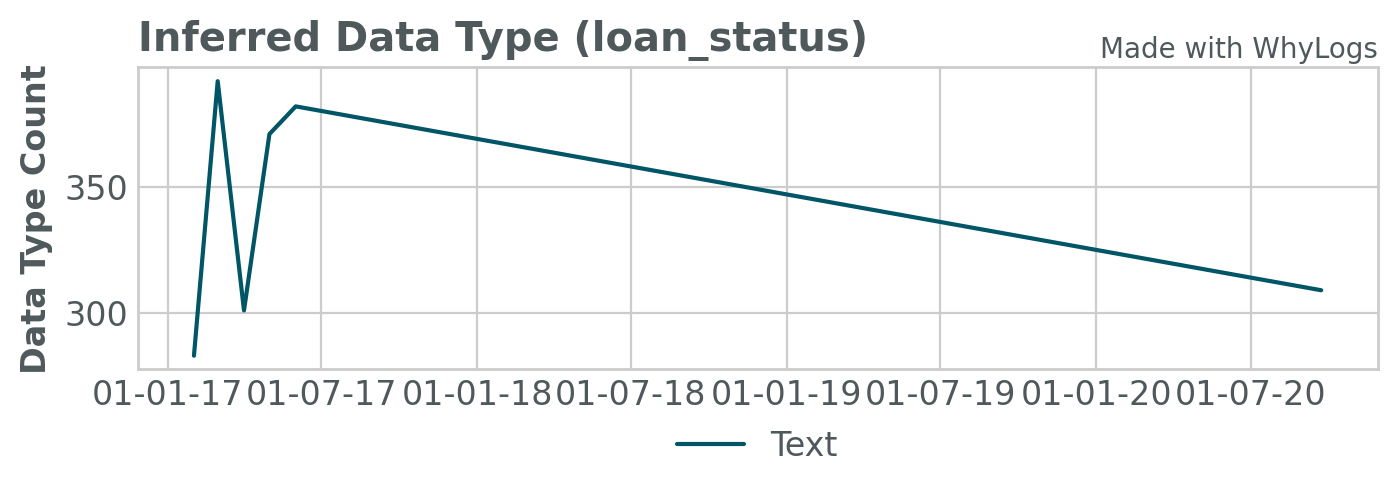

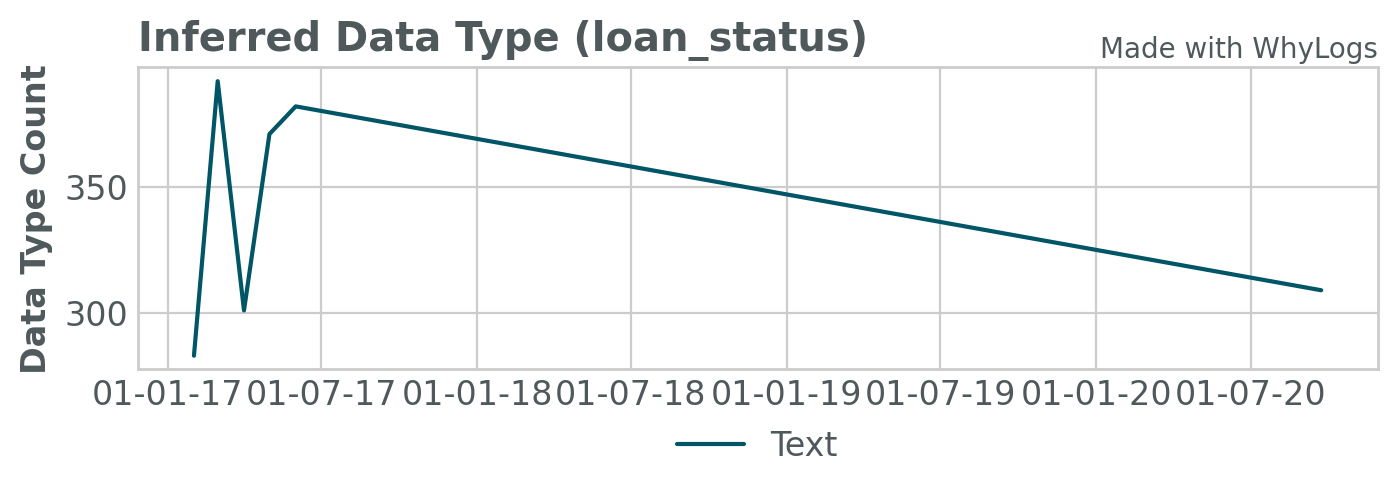

In [24]:
viz.plot_data_types("loan_status")

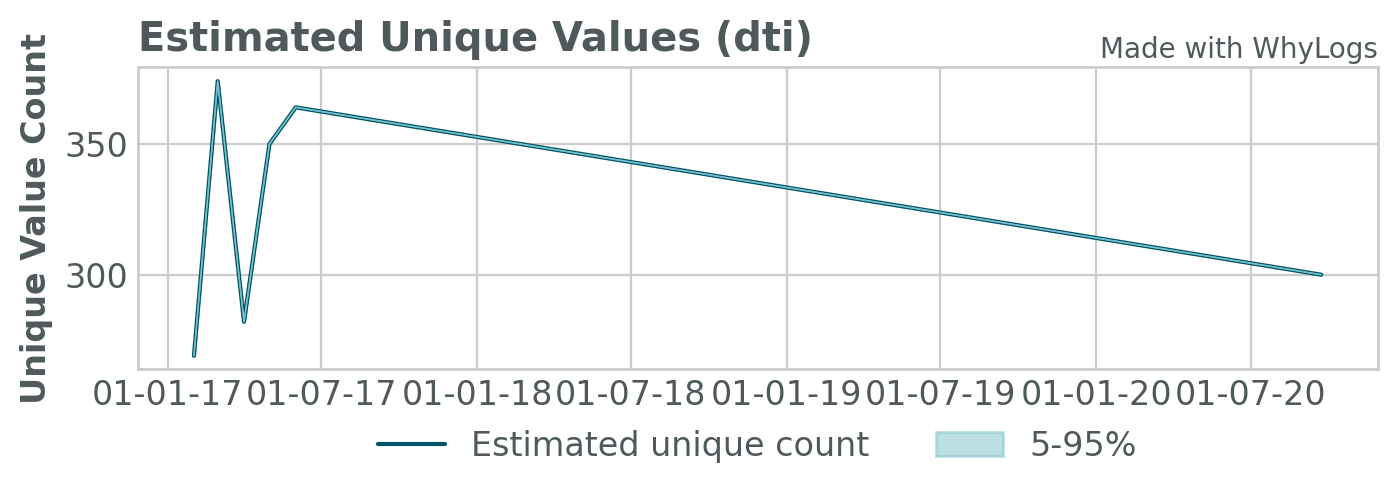

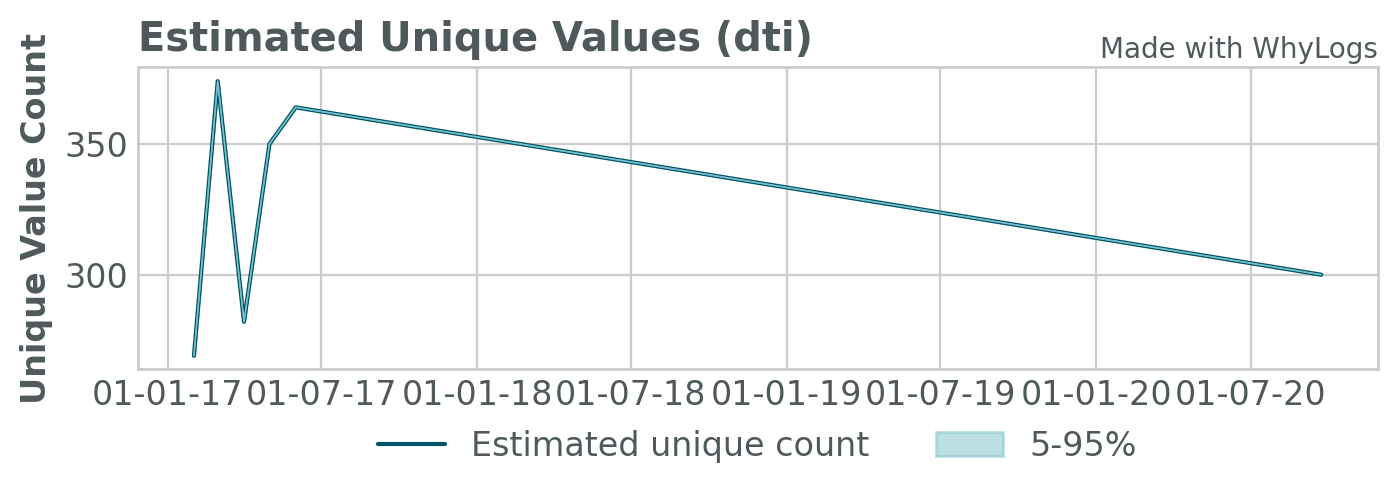

In [25]:
viz.plot_uniqueness("dti")

/Users/andy/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/andy/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


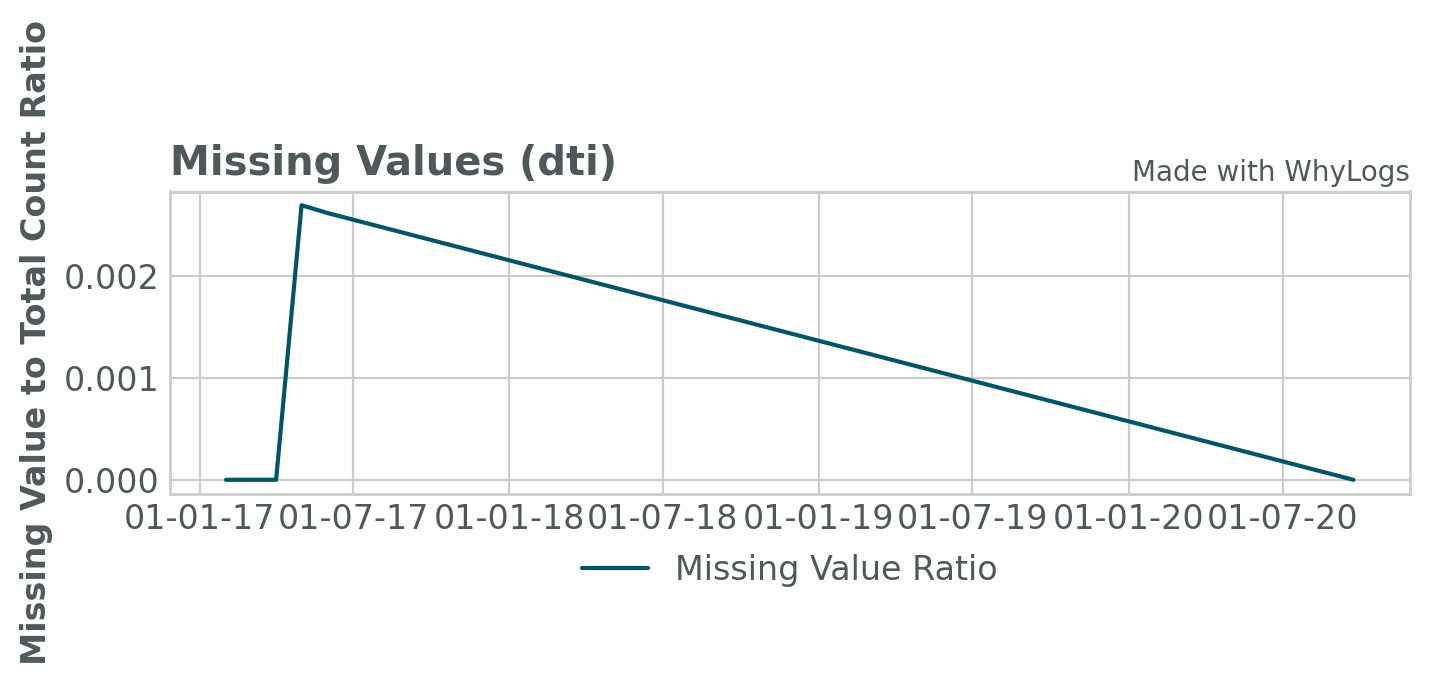

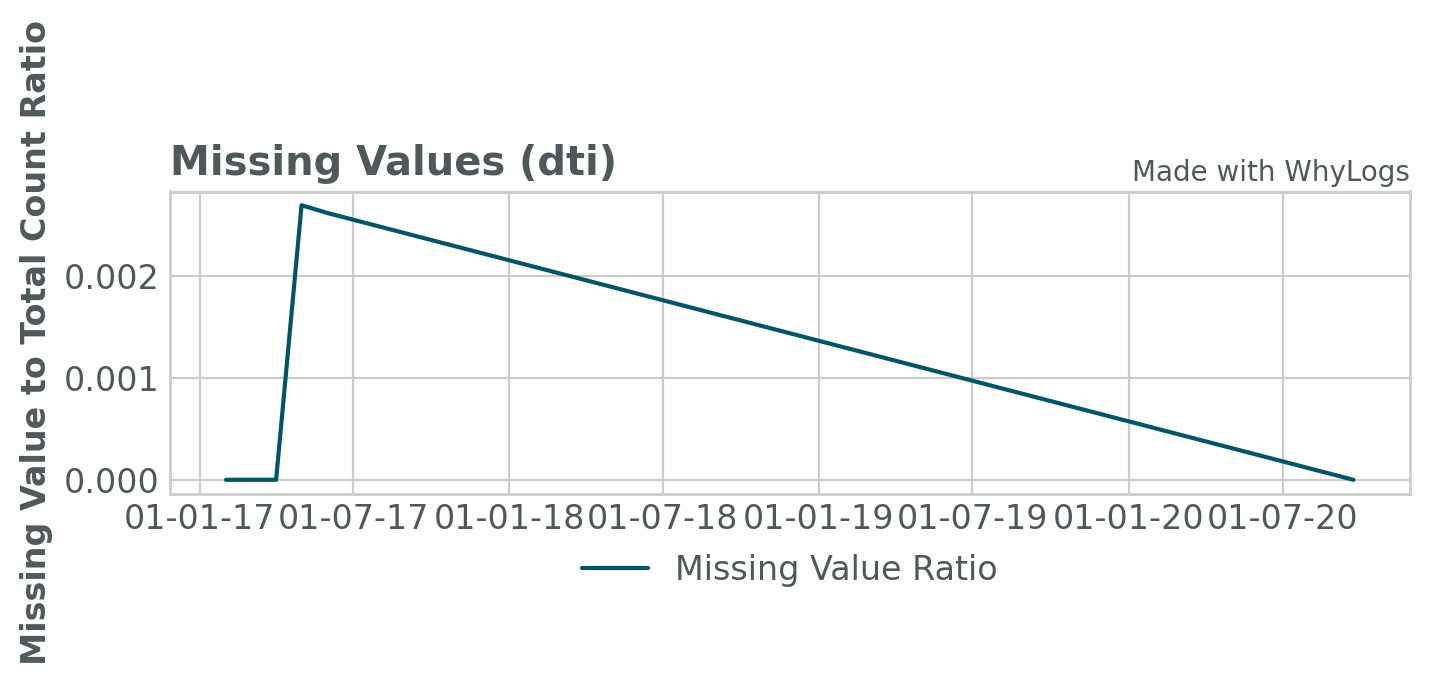

In [26]:
viz.plot_missing_values("dti")

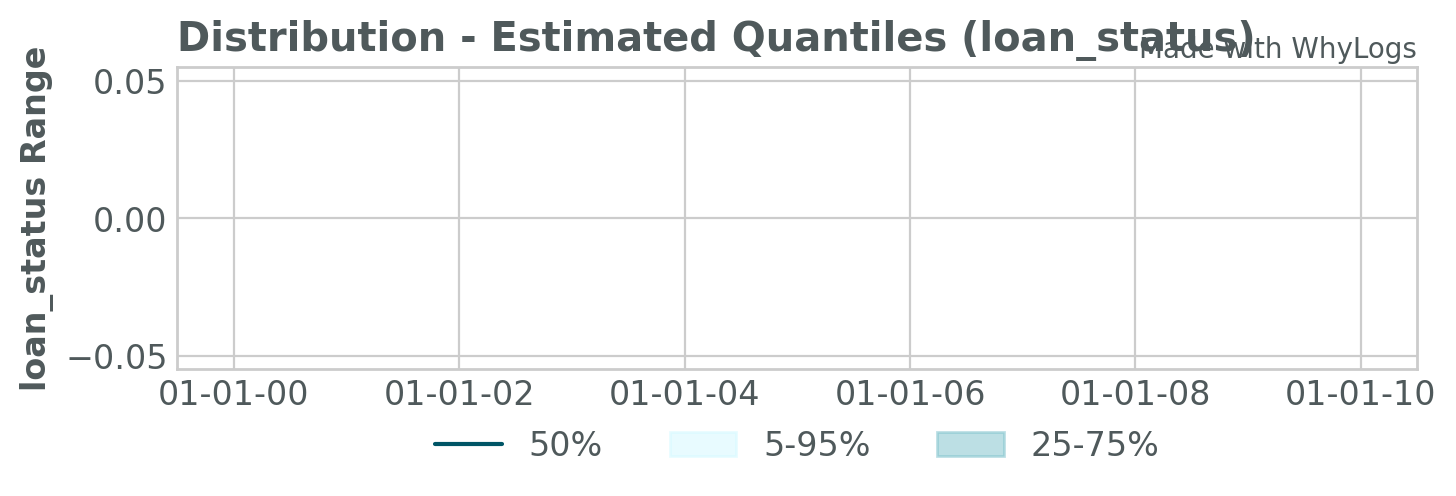

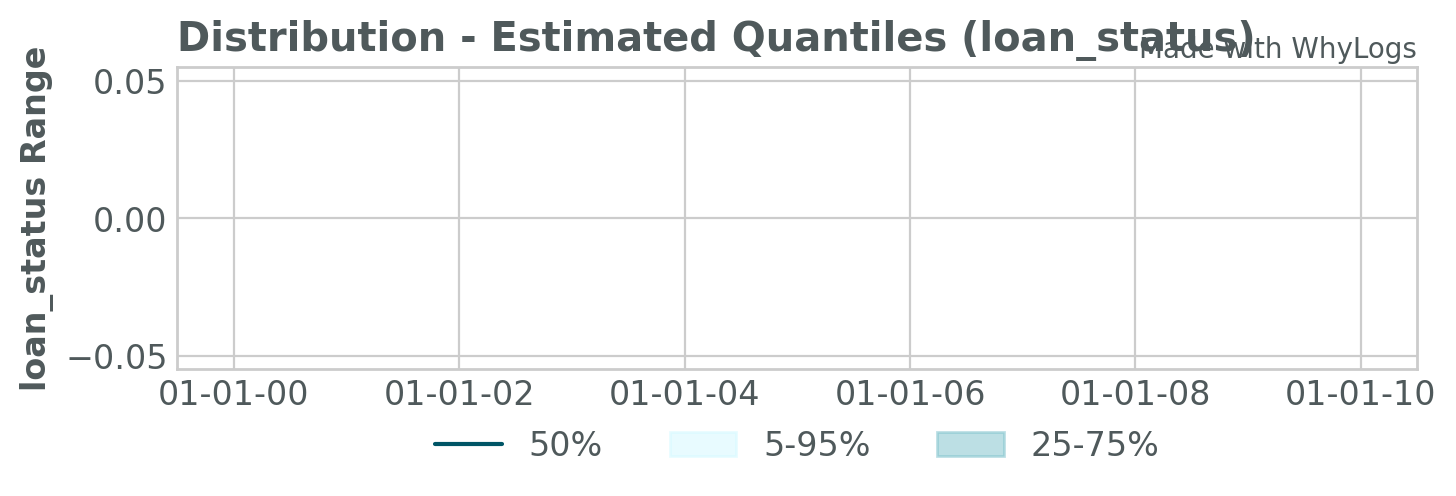

In [27]:
viz.plot_distribution('loan_status', type='discrete')

# Wrapping up

Once you're done with your session, you can close it. Closing a session will close all downstream loggers and force them to write to disk.

Note that for dataset profiles, they are in-memory so they won't be discarded with the session. You can use them as long as you'd like!

In [28]:
session.close()

In [29]:
session.is_active()

False